In [1]:
using Random
using Plots
using LinearAlgebra
using Einsum
using RegularizedLeastSquares

In [67]:
#using Pkg
#Pkg.add("RegularizedLeastSquares")
#using RegularizedLeastSquares

    Updating registry at `C:\Users\Nicholas\.julia\registries\General.toml`
   Resolving package versions...


    Updating `C:\Users\Nicholas\.julia\environments\v1.8\Project.toml`
  [1e9c538a] + RegularizedLeastSquares v0.9.0
    Updating `C:\Users\Nicholas\.julia\environments\v1.8\Manifest.toml`


  [14f7f29c] + AMD v0.5.0
  [79e6a3ab] + Adapt v3.6.1
  [dce04be8] + ArgCheck v2.3.0
  [4fba245c] + ArrayInterface v7.2.0
  [198e06fe] + BangBang v0.3.37
  [9718e550] + Baselet v0.1.1
  [62783981] + BitTwiddlingConvenienceFunctions v0.1.5
  [2a0fbf3d] + CPUSummary v0.2.2
  [a33af91c] + CompositionsBase v0.1.1
  [187b0558] + ConstructionBase v1.5.1
  [6add18c4] + ContextVariablesX v0.1.3
  [adafc99b] + CpuId v0.3.1
  [e2d170a0] + DataValueInterfaces v1.0.0
  [244e2a9f] + DefineSingletons v0.1.2
  [e2ba6199] + ExprTools v0.1.8
  [cc61a311] + FLoops v0.2.1
  [b9860ae5] + FLoopsBase v0.1.1
  [9aa1b823] + FastClosures v0.3.2
  [3e5b6fbb] + HostCPUFeatures v0.1.14
  [615f187c] + IfElse v0.1.1
  [22cec73e] + InitialValues v0.3.1
  [42fd0dbc] + IterativeSolvers v0.9.2
  [82899510] + IteratorInterfaceExtensions v1.0.0
  [b14d175d] + JuliaVariables v0.2.4
  [40e66cde] + LDLFactorizations v0.10.0
  [10f19ff3] + LayoutPointers v0.1.14
  [5c8ed15e] + LinearOperators v2.5.1
  [d8e11817] + MLStyle v0

In [288]:
n = 1
m = 100
b = 2
x = range(-1,1,length=m)
f(x) = b*(0*x^2 + sin(0.8*2π*x)+ 1*cos(2.3*2π*x))
ϵ = b*randn(m)/sqrt(m)
y = f.(x) + ϵ;

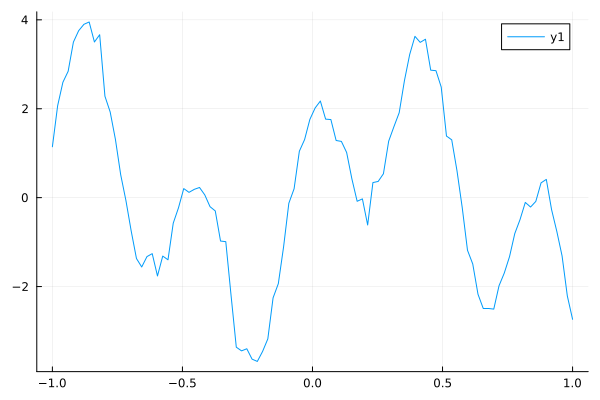

In [289]:
plot(x,y)

In [223]:
ϕ(1,1,1)

1.0 - 2.4492935982947064e-16im

In [232]:
A

100×75 Matrix{ComplexF64}:
 -0.937951-0.346768im    0.973889-0.227027im  …  -0.367893+0.929868im
 -0.960081-0.27972im     0.938916-0.344147im     -0.447825+0.894121im
 -0.977426-0.211278im    0.889916-0.456125im     -0.524323+0.851519im
 -0.989898-0.141783im     0.82762-0.561289im     -0.596801+0.802389im
 -0.997435-0.0715801im   0.752959-0.658067im     -0.664704+0.747107im
 -0.999999-0.00102085im  0.667049-0.745014im  …  -0.727511+0.686097im
 -0.997579+0.0695435im   0.571174-0.820829im     -0.784739+0.619826im
 -0.990185+0.139761im    0.466764-0.884382im     -0.835951+0.548803im
 -0.977855+0.209282im    0.355382-0.934721im     -0.880754+0.473573im
 -0.960651+0.27776im     0.238689-0.971096im     -0.918805+0.394712im
          ⋮                                   ⋱  
 -0.977855-0.209282im    0.355382+0.934721im     -0.880754-0.473573im
 -0.990185-0.139761im    0.466764+0.884382im     -0.835951-0.548803im
 -0.997579-0.0695435im   0.571174+0.820829im     -0.784739-0.619826im
 -0.999999+0.

error = 0.0684289742763805


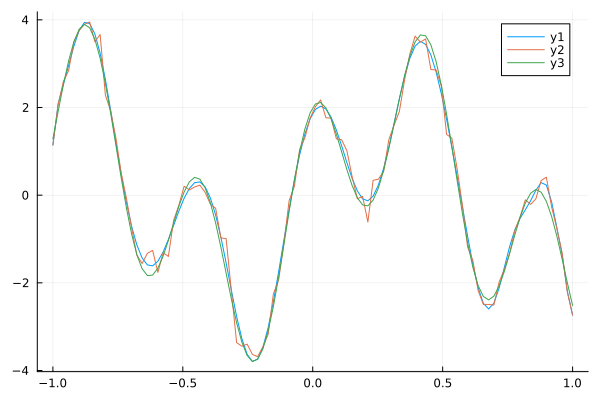

In [309]:
N = 50
ϕ(x,ω1,ω2) = sin(2π*ω1*x + ω2) # sinusoidal features#exp(2π*im*ω1*x) 
#ϕ(x,ω1,ω2) = exp(-(x-ω2)^2/(2ω1^2))  # Gaussian features
ω1 = rand(Float64,(N,))*3 #range(0,2,N) #randn(N)*3
ω2 = randn(N);
@einsum A[i,j] := ϕ(x[i],ω1[j],ω2[j]);
#A = zeros((m,N))
#A = reshape([ϕ(x[i],ω1[j],0) for j ∈ eachindex(ω1) for i ∈ eachindex(x)],m,N)
c = A\y;
error = norm(f.(x)-A*c)/norm(f.(x))
@show error
plot(x,[real.(A*c),y,f.(x)])

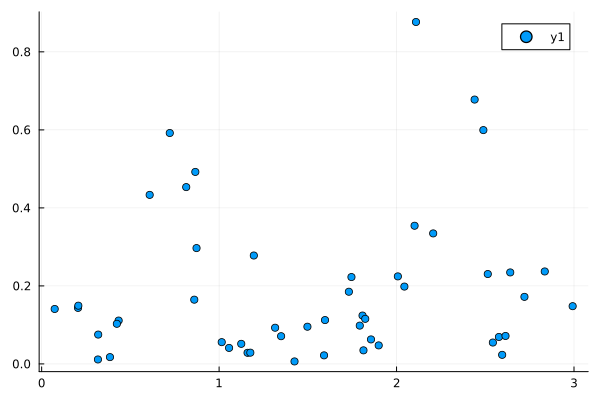

In [312]:
scatter(abs.(ω1),abs.(c))
#scatter(abs.(ω1),c)

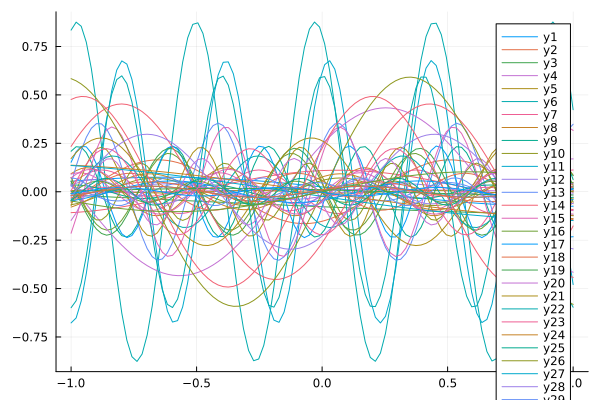

In [313]:
plot(x,[A[:,j]*c[j] for j ∈ eachindex(A[1,:])])

In [45]:
@show ω1[10]
@show ω2[N];

ω1[10] = 1.3095808073184672
ω2[N] = -2.150625112472218


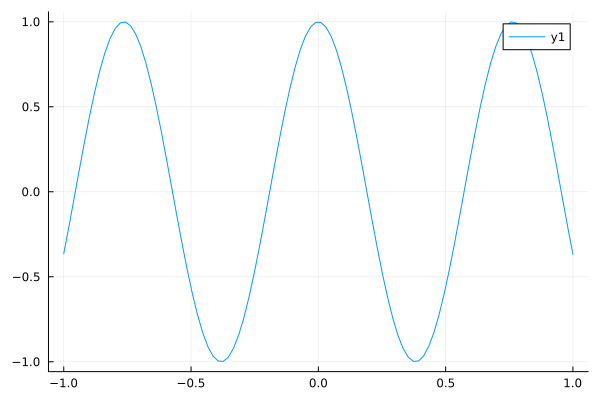

In [44]:
plot(x, ϕ.(x,ω1[10],ω2[10]))

In [10]:
#import Pkg
#Pkg.add("Einsum")

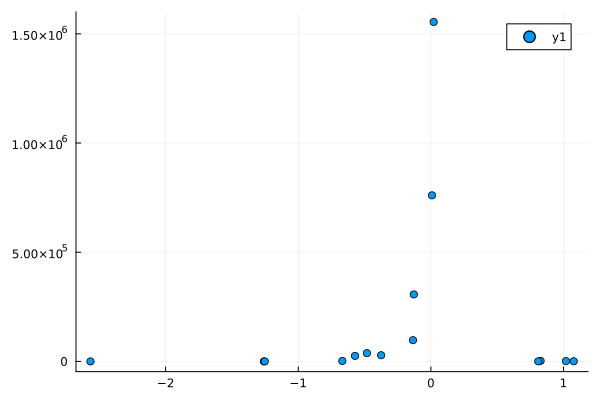

In [11]:
@einsum A[i,j] := ϕ(x[i],ω1[j],ω2[j]);
c = A\y;
plot(x,[A*c,y])
scatter(ω1,abs.(c))

In [125]:
reg = Regularization("L1", 5.; shape=(N,N))
solver = createLinearSolver("fista", A; reg=reg)
c = solve(solver, y)

25-element Vector{Float64}:
  0.0
 -0.0
  0.0
  0.0
  0.0
 -0.0
  0.0
  0.0
 -0.0
  0.0
  ⋮
  0.26056093743681563
  0.37514095092946537
  0.8087808601032817
 -0.5103629656246138
  0.0
 -0.0
  0.0
  0.0
  0.3928238183933293

error = 0.1478148699926009


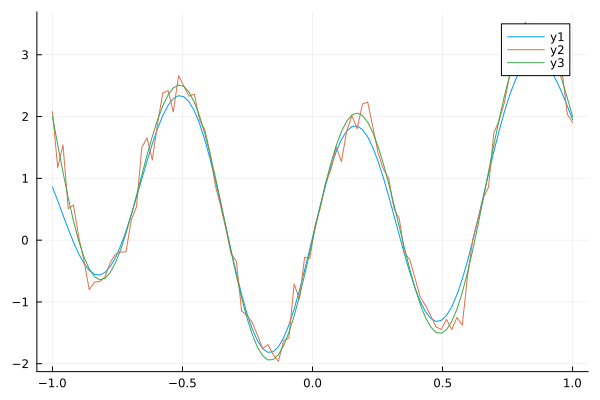

In [126]:
error = norm(f.(x)-A*c)/norm(f.(x))
@show error
plot(x,[A*c,y,f.(x)])

In [276]:
λ = 8

L = norm(A'A)
G = I-A'A/L
b = A'y/L
a = λ/L

function shr(x) # need to actually use a group lasso solver...
    if real(x) > a
        return x-a
    elseif real(x) < -a
        return x+a
    else
        return 0
    end
end

function ista_step(x)
    return shr.(G*x + b)
end

function ista(x0, tol, maxit=100)
    xold = x0*0
    x = ista_step(x0)
    i=0
    while (norm(xold - x) > tol) & (i > maxit)
        xold = x
        x = ista_step(xold)
        i+=1
        @show i
    end
    return x
end

ista (generic function with 2 methods)

In [277]:
norm(A\y - ista_step(A\y))

0.022895538950150333

In [278]:
c = ista(A\y, 0.01)

75-element Vector{ComplexF64}:
  1.2856233148876173e11 + 2.1902405071755624e9im
   7.135087456416677e11 + 6.89127340839396e9im
  -3.268083981235248e11 - 9.368059134628733e9im
   7.242308782063169e11 + 1.3450509772648998e10im
   4.024424304953572e11 + 7.080565824107109e9im
   3.609834269229945e11 + 4.950910449247374e9im
  -3.6574262948325496e9 + 1.625229624581827e7im
   6.086322919250073e11 + 1.0288738813128368e10im
   -5.500794474033861e9 + 3.767892762457018e9im
 -1.4817081253235065e11 - 1.767748254797125e9im
                        ⋮
   4.713161540060573e10 + 3.49500096872666e9im
  -4.382754470315794e11 - 8.138380002617015e9im
  -6.442112715158684e11 - 1.0521221640141739e10im
 -1.9551540033050534e11 - 2.9790081328331475e9im
   4.921685444297506e11 - 3.1524970768762514e7im
  -8.910214807968574e11 - 1.4953698039793795e10im
 -2.6366483005369196e11 - 3.128145178109508e8im
 -2.1916179536872986e11 - 5.812557217223126e9im
  -7.817406001905029e11 - 1.090124905808252e10im

In [310]:
σ = 0.05 # 5% relative error desired
δ = 0.2 # step size
relative_error(a, b) = norm(a - b)/norm(a)

function solve_for_c(λ)
    reg = Regularization("L1", λ; shape=(N,N))
    solver = createLinearSolver("fista", A; reg=reg)
    c = solve(solver, y)
    return c
end

λ=0.
i=0
c = solve_for_c(λ)
c_old = c
while relative_error(y, A*c) < σ
    c_old = c # save the previous best coefficients
    i += 1
    λ += δ # increase regularization by one step
    c = solve_for_c(λ)
    @show i, λ
end
c = c_old; # use the previously calculated c since it is the result
          # of the largest λ s.t. relative_error(f.(x), A*c) < σ

50-element Vector{Float64}:
 -0.07520545236466614
  0.16469070789890072
 -0.14086244562385014
  0.011413601696318715
 -0.006382492379528583
 -0.876557787924665
 -0.11240975893097135
  0.1239690910449465
  0.23454701714525383
  0.07104257923123508
  ⋮
  0.5919592997702389
 -0.1492717100851322
  0.2969307798902307
  0.0716811981945845
  0.49220928400818165
  0.11558012205588591
  0.10286768529703126
 -0.02194042288318587
  0.028855469770287547

In [311]:
relative_error(f.(x), A*c)

0.04893658315681519